Dati dal 2025-02-03 al 2025-02-07 → 5 giorni


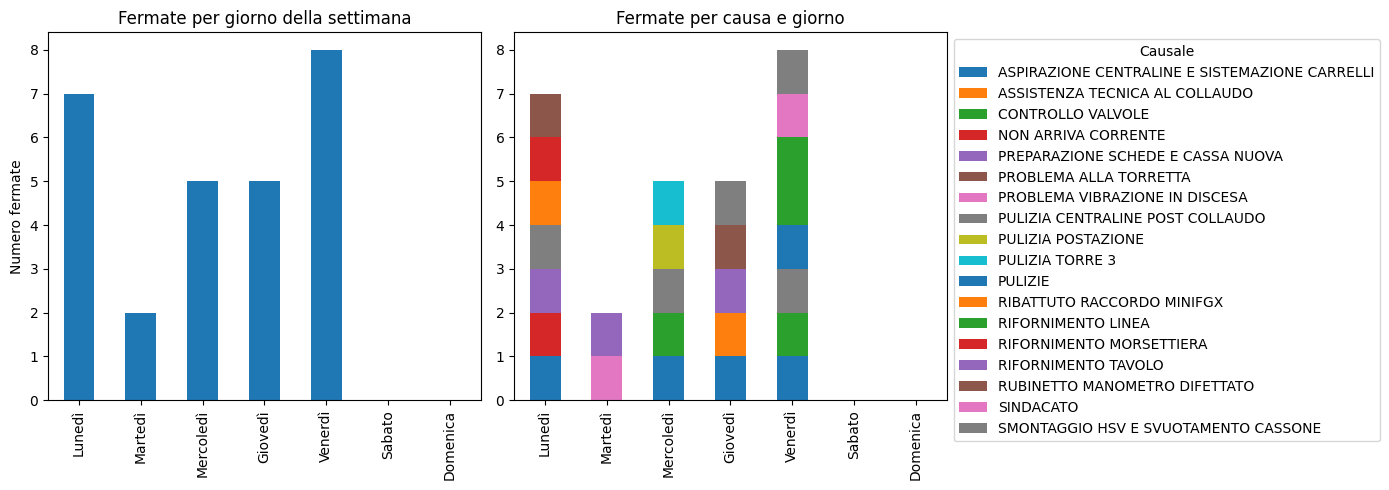

In [32]:
# 1) Installa engine Excel e Matplotlib
import micropip
await micropip.install(["openpyxl", "matplotlib"])

# 2) Librerie
import pandas as pd
import matplotlib.pyplot as plt

# 3) Leggi il foglio “CAUSALI A MANO” (header sulla seconda riga)
df = pd.read_excel(
    "ANALISI CAUSALI OEE.xlsx",
    sheet_name="CAUSALI A MANO",
    header=1
)

# 4) Pulisci eventuali colonne Unnamed e rifinisci i nomi
df = df.drop(columns=[c for c in df.columns if c.startswith("Unnamed")])
df.columns = df.columns.str.strip()

# 5) Assicura che GIORNO sia datetime
df["GIORNO"] = pd.to_datetime(df["GIORNO"])

# 6) Range e numero di giorni
min_d, max_d = df["GIORNO"].min(), df["GIORNO"].max()
num_days = (max_d - min_d).days + 1
print(f"Dati dal {min_d.date()} al {max_d.date()} → {num_days} giorni")

# 7) Mappa i giorni della settimana in italiano
mapp = {
    0:"Lunedì", 1:"Martedì", 2:"Mercoledì",
    3:"Giovedì",4:"Venerdì",5:"Sabato",6:"Domenica"
}
df["weekday"] = df["GIORNO"].dt.dayofweek.map(mapp)

# 8) Se sono ≤7 giorni, disegna i plot
if num_days <= 7:
    order = [
        "Lunedì","Martedì","Mercoledì",
        "Giovedì","Venerdì","Sabato","Domenica"
    ]
    # a) conteggio semplice per giorno
    counts = df["weekday"].value_counts().reindex(order, fill_value=0)

    # b) pivot causa × giorno
    pivot = (
        df
        .pivot_table(
            index="weekday",
            columns="CAUSALE",
            values="GIORNO",
            aggfunc="count"
        )
        .reindex(order, fill_value=0)
    )

    # c) disegno affiancato
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,5))

    counts.plot.bar(ax=ax1)
    ax1.set_title("Fermate per giorno della settimana")
    ax1.set_ylabel("Numero fermate")
    ax1.set_xlabel("")

    pivot.plot.bar(stacked=True, ax=ax2)
    ax2.set_title("Fermate per causa e giorno")
    ax2.set_xlabel("")
    ax2.legend(title="Causale", bbox_to_anchor=(1,1))

    plt.tight_layout()
    plt.show()

else:
    print("Range > 7 giorni: considera aggregazioni mensili o settimanali.")


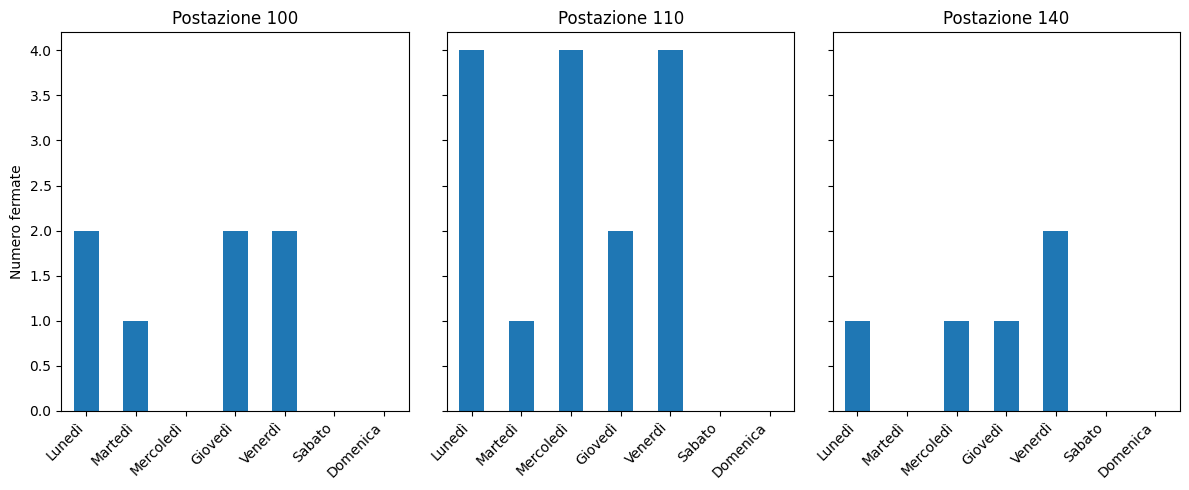

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Assicuriamoci che weekday sia già pronto e con l’ordine giusto
order = ["Lunedì","Martedì","Mercoledì","Giovedì","Venerdì","Sabato","Domenica"]

# 1) Pivot: conteggio fermate per postazione × giorno
pivot_station = (
    df
    .pivot_table(
        index="weekday",      # giorno della settimana
        columns="POSTAZIONE", # postazione
        values="GIORNO",      # conta le date
        aggfunc="count"
    )
    .reindex(order, fill_value=0)
)

# 2) Prepara subplots: uno per ogni postazione
stations = pivot_station.columns.tolist()
n = len(stations)
fig, axes = plt.subplots(1, n, figsize=(4*n, 5), sharey=True)

# se c’è solo una postazione, axes non è lista
if n == 1:
    axes = [axes]

# 3) Disegna i bar chart
for ax, st in zip(axes, stations):
    pivot_station[st].plot.bar(ax=ax)
    ax.set_title(f"Postazione {st}")
    ax.set_xlabel("")
    ax.set_xticklabels(order, rotation=45, ha="right")
    
# y-axis solo sul primo subplot
axes[0].set_ylabel("Numero fermate")

plt.tight_layout()
plt.show()
